# Aula Prática: Árvores de Decisão (Binário vs. Multiclasse)
Neste laboratório, vamos explorar como as Árvores de Decisão se comportam em dois cenários diferentes:

Classificação Binária: Diagnóstico médico (Sim/Não).

Classificação Multiclasse: Botânica (Espécie A,

## Configuração Inicial
Importação das bibliotecas necessárias.

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Configuração para melhorar a resolução dos gráficos
%matplotlib inline
plt.rcParams['figure.dpi'] = 100

## Parte 1: Classificação Binária (Breast Cancer)
Cenário: Temos de classificar tumores como Malignos (0) ou Benignos (1). Desafio: É um problema de alto risco. Errar um cancro (Falso Negativo) é gravíssimo.

### 1.1 Carregar e Preparar Dados

In [11]:
from sklearn.datasets import load_breast_cancer

# 1. Carregar o Dataset
data_bc = load_breast_cancer()
X_bc = data_bc.data
y_bc = data_bc.target

# Nomes das Features e Classes
print(f"Features (ex): {data_bc.feature_names[:5]}")
print(f"Classes: {data_bc.target_names}") # ['malignant' 'benign']

# 2. Divisão Treino/Teste
# stratify=y garante que mantemos a proporção de cancros nos dois conjuntos
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(
    X_bc, y_bc, test_size=0.3, stratify=y_bc, random_state=42
)

print(f"Treino: {X_train_bc.shape}, Teste: {X_test_bc.shape}")

Features (ex): ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']
Classes: ['malignant' 'benign']
Treino: (398, 30), Teste: (171, 30)


### 1.2 Treino do Modelo

Vamos treinar uma árvore com profundidade limitada para evitar overfitting e facilitar a leitura.

In [13]:
# Criar o modelo com profundidade máxima de 3
clf_bc = DecisionTreeClassifier(max_depth=3, random_state=42)

# Treinar
clf_bc.fit(X_train_bc, y_train_bc)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

### 1.3 Visualização da Decisão

Como é que o modelo toma decisões? Vamos "abrir a caixa preta".

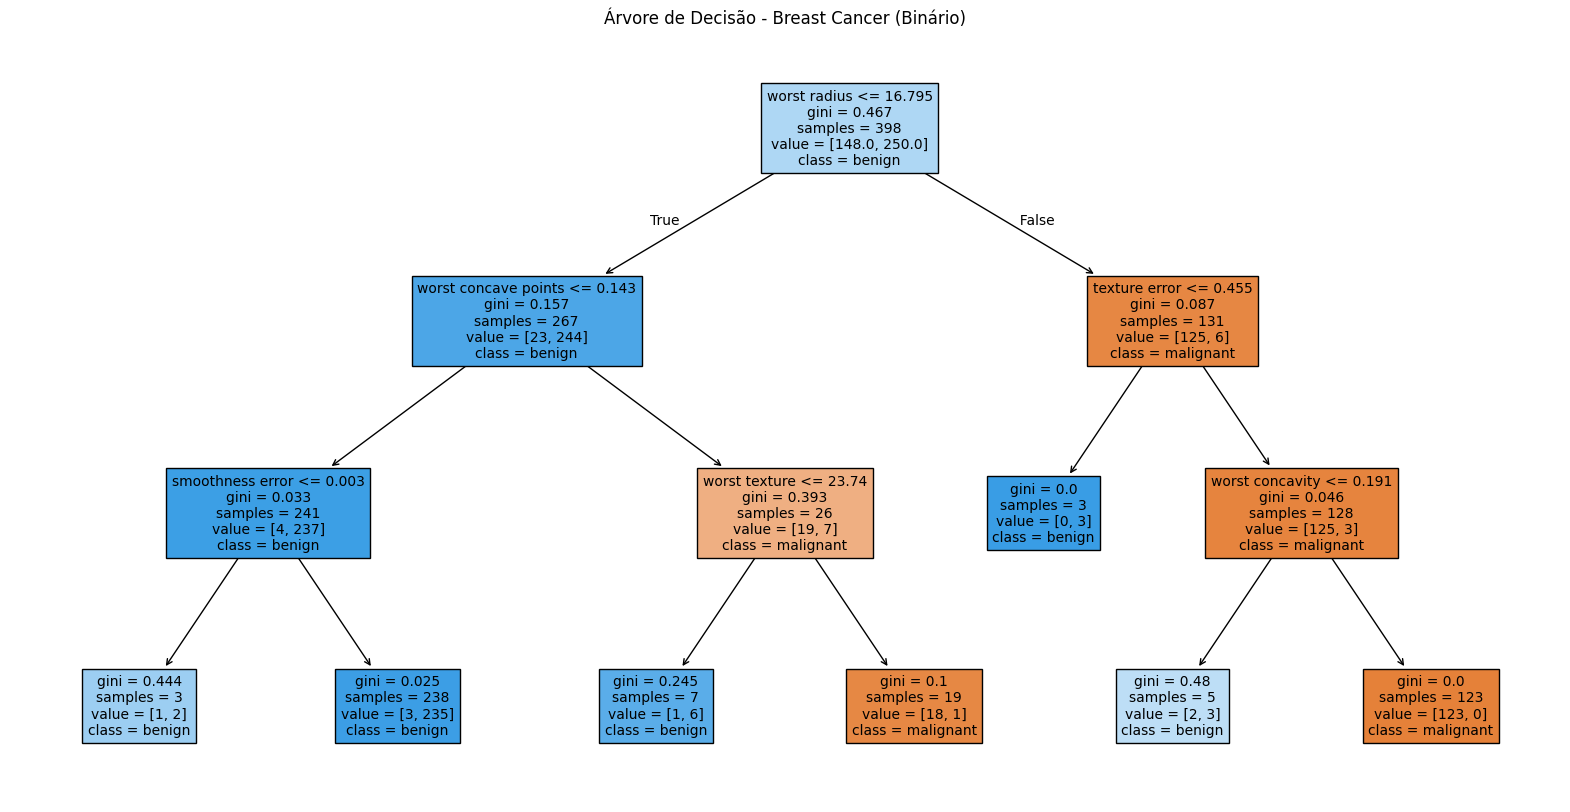

In [14]:
plt.figure(figsize=(20, 10))
plot_tree(clf_bc,
          feature_names=data_bc.feature_names,
          class_names=data_bc.target_names,
          filled=True,
          fontsize=10)
plt.title("Árvore de Decisão - Breast Cancer (Binário)")
plt.show()

Para Análise: Observe o nó raiz. Qual é a feature mais importante para distinguir Maligno de Benigno? Observe como as cores (Laranja/Azul) se tornam mais puras nas folhas.

### 1.4 Avaliação (Matriz de Confusão Binária)

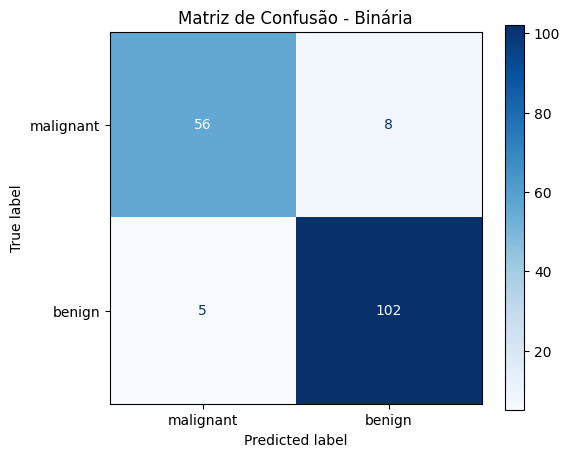

              precision    recall  f1-score   support

   malignant       0.92      0.88      0.90        64
      benign       0.93      0.95      0.94       107

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



In [15]:
# Prever dados de teste
y_pred_bc = clf_bc.predict(X_test_bc)

# Plotar Matriz
fig, ax = plt.subplots(figsize=(6, 5))
ConfusionMatrixDisplay.from_predictions(
    y_test_bc, y_pred_bc,
    display_labels=data_bc.target_names,
    cmap='Blues',
    ax=ax
)
plt.title("Matriz de Confusão - Binária")
plt.show()

# Relatório Numérico
print(classification_report(y_test_bc, y_pred_bc, target_names=data_bc.target_names))

## Parte 2: Classificação Multiclasse (Iris)
Cenário: Identificar a espécie de uma flor Iris com base nas medidas das pétalas e sépalas. Classes: Setosa, Versicolor, Virginica. Diferença: Agora a matriz de confusão cresce e os erros podem acontecer entre classes específicas (ex: confundir Versicolor com Virginica).

### 2.1 Carregar e Preparar Dados

In [16]:
from sklearn.datasets import load_iris

# 1. Carregar Dataset
data_iris = load_iris()
X_iris = data_iris.data
y_iris = data_iris.target

print(f"Classes: {data_iris.target_names}") # ['setosa' 'versicolor' 'virginica']

# 2. Divisão Treino/Teste
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.3, stratify=y_iris, random_state=42
)

Classes: ['setosa' 'versicolor' 'virginica']


### 2.2 Treino do Modelo

O código é exatamente igual ao binário! O Scikit-Learn adapta-se automaticamente.

In [17]:
# Vamos deixar a árvore crescer livremente (sem max_depth) pois o dataset é pequeno
clf_iris = DecisionTreeClassifier(random_state=42)
clf_iris.fit(X_train_iris, y_train_iris)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

### 2.3 Visualização da Decisão

Note como agora temos 3 cores principais na árvore, representando as 3 classes.

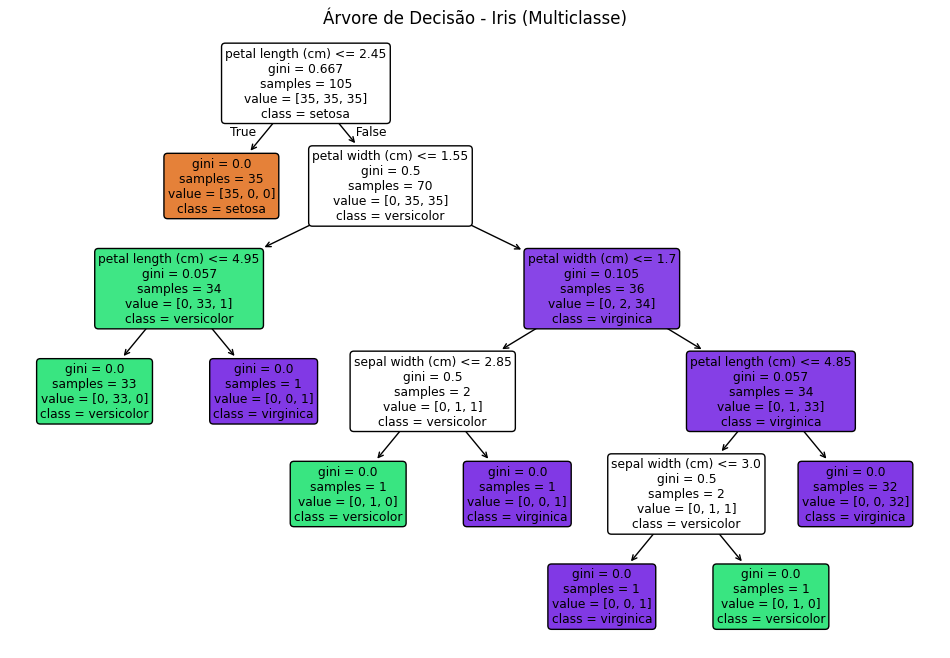

In [18]:
plt.figure(figsize=(12, 8))
plot_tree(clf_iris,
          feature_names=data_iris.feature_names,
          class_names=data_iris.target_names,
          filled=True,
          rounded=True)
plt.title("Árvore de Decisão - Iris (Multiclasse)")
plt.show()

Para Análise: Note a simplicidade da classe Setosa (provavelmente isolada logo na primeira ou segunda pergunta). As classes Versicolor e Virginica são mais difíceis de separar?

### 2.4 Avaliação (Matriz de Confusão 3x3)

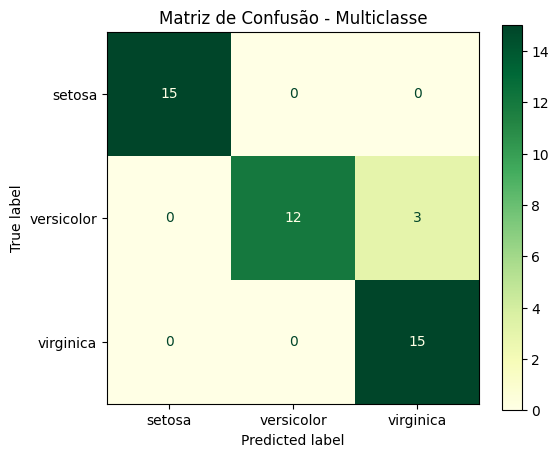

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.80      0.89        15
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



In [19]:
y_pred_iris = clf_iris.predict(X_test_iris)

# Plotar Matriz 3x3
fig, ax = plt.subplots(figsize=(6, 5))
ConfusionMatrixDisplay.from_predictions(
    y_test_iris, y_pred_iris,
    display_labels=data_iris.target_names,
    cmap='YlGn',
    ax=ax
)
plt.title("Matriz de Confusão - Multiclasse")
plt.show()

print(classification_report(y_test_iris, y_pred_iris, target_names=data_iris.target_names))

## Conclusão e Discussão
Binário: A matriz é 2x2. Focamo-nos muito em Falsos Positivos vs Falsos Negativos (Erro Tipo I vs Tipo II).

Multiclasse: A matriz é NxN. O foco muda para: "Quais as classes que o modelo confunde?".

No exemplo Iris: Geralmente o modelo nunca erra a Setosa, mas pode confundir Versicolor com Virginica. A matriz mostra isso visualmente (números fora da diagonal principal).